In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [67]:
crest_paths = {
    "Arsenal": "Arsenal-FC-logo-480x480.png",
    "Aston Villa": "Aston-Villa-FC-logo-480x480.png",
    "Bournemouth": "AFC-Bournemouth-logo-480x480.png",
    "Brentford": "Brentford-FC-logo-480x480.png",
    "Brighton": "Brighton-Hove-Albion-logo-480x480.png",
    "Chelsea": "Chelsea-FC-logo-480x480.png",
    "Cry. Palace": "Crystal-Palace-FC-logo-480x480.png",
    "Everton": "Everton-FC-logo-480x480.png",
    "Fulham": "Fulham-FC-logo-480x480.png",
    "Liverpool": "Liverpool-FC-logo-480x480.png",
    "Man. City": "Manchester-City-FC-logo-480x480.png",
    "Man. Utd": "Manchester-United-FC-logo-480x480.png",
    "Newcastle": "Newcastle-United-logo-480x480.png",
    "Nott Forest": "Nottingham-Forest-FC-logo-480x480.png",
    "Spurs": "Tottenham-Hotspur-logo-480x480.png",
    "West Ham": "West-Ham-United-FC-logo-480x480.png",
    "Wolves": "Wolverhampton-Wanderers-logo-480x480.png"}

In [60]:
# Change in xPoints (24/25 - 23/24)
xpoints_change = [       
    ("Arsenal", -12),               
    ("Aston Villa", 3),  
    ("Bournemouth", 10), 
    ("Brentford", 2),               
    ("Brighton", 2),  
    ("Chelsea", 2),                 
    ("Cry. Palace", 9),          
    ("Everton", -4),                 
    ("Fulham", 7),                  
    ("Liverpool", 3),               
    ("Man. City", -14),        
    ("Man. Utd", 7),       
    ("Newcastle", 0),        
    ("Nott Forest", 0),
    ("Spurs", -7),    
    ("West Ham", 1),           
    ("Wolves", 3)]

# Change in xG (24/25 - 23/24)
xg_change = [
    ("Arsenal", -15.8),
    ("Aston Villa", -7.4),
    ("Bournemouth", 8.2),
    ("Brentford", 0.4),
    ("Brighton", 1.2),
    ("Chelsea", -6.1),
    ("Cry. Palace", 12.2),
    ("Everton", -12.8),
    ("Fulham", -2.1),
    ("Liverpool", -5.9),
    ("Man. City", -12.7),
    ("Man. Utd", -3.4),
    ("Newcastle", -11.7),
    ("Nott Forest", -3.7),
    ("Spurs", -9.3),
    ("West Ham", -4.8),
    ("Wolves", -3.2),]

xg_against_change = [
    ("Arsenal", 6.7),
    ("Aston Villa", -9.9),
    ("Bournemouth", -9.5),
    ("Brentford", -0.6),
    ("Brighton", -1.3),
    ("Chelsea", -11.0),
    ("Cry. Palace", -2.4),
    ("Everton", -9.2),
    ("Fulham", -16.1),
    ("Liverpool", -7.5),
    ("Man. City", 12.6),
    ("Man. Utd", -15.0),
    ("Newcastle", -15.7),
    ("Nott Forest", -4.3),
    ("Spurs", -0.2),
    ("West Ham", -11.6),
    ("Wolves", -10.2)]

club_spend_24_25 = [   # in millions
    ("Arsenal", 101.5),
    ("Aston Villa", 129.5),
    ("Bournemouth", 80.7),
    ("Brentford", 97.5),
    ("Brighton", 192.0),
    ("Chelsea", 219.6),
    ("Cry. Palace", 76.0),
    ("Everton", 46.0),
    ("Fulham", 89.0),
    ("Liverpool", 41.5),
    ("Man. City", 33.6),
    ("Man. Utd", 205.9),
    ("Newcastle", 43.0),
    ("Nott Forest", 90.3),
    ("Spurs", 133.5),
    ("West Ham", 132.5),
    ("Wolves", 53.3)]

income_24_25 = [
    ("Arsenal", 97.5),
    ("Aston Villa", 136.4),
    ("Bournemouth", 65.0),
    ("Brentford", 67.0),
    ("Brighton", 40.5),
    ("Chelsea", 153.3),
    ("Cry. Palace", 98.3),
    ("Everton", 70.2),
    ("Fulham", 47.4),
    ("Liverpool", 62.5),
    ("Man. City", 146.9),
    ("Man. Utd", 94.7),
    ("Newcastle", 65.0),
    ("Nott Forest", 47.0),
    ("Spurs", 62.9),
    ("West Ham", 32.5),
    ("Wolves", 94.0)]

net_spend_24_25 = [
    ("Arsenal", 4.0),
    ("Aston Villa", -6.9),
    ("Bournemouth", 15.7),
    ("Brentford", 30.5),
    ("Brighton", 151.5),
    ("Chelsea", 66.3),
    ("Cry. Palace", -22.3),
    ("Everton", -24.2),
    ("Fulham", 41.6),
    ("Liverpool", -21.0),
    ("Man. City", -113.3),
    ("Man. Utd", 111.2),
    ("Newcastle", -22.0),
    ("Nott Forest", 43.3),
    ("Spurs", 70.6),
    ("West Ham", 100.0),
    ("Wolves", -40.7)]

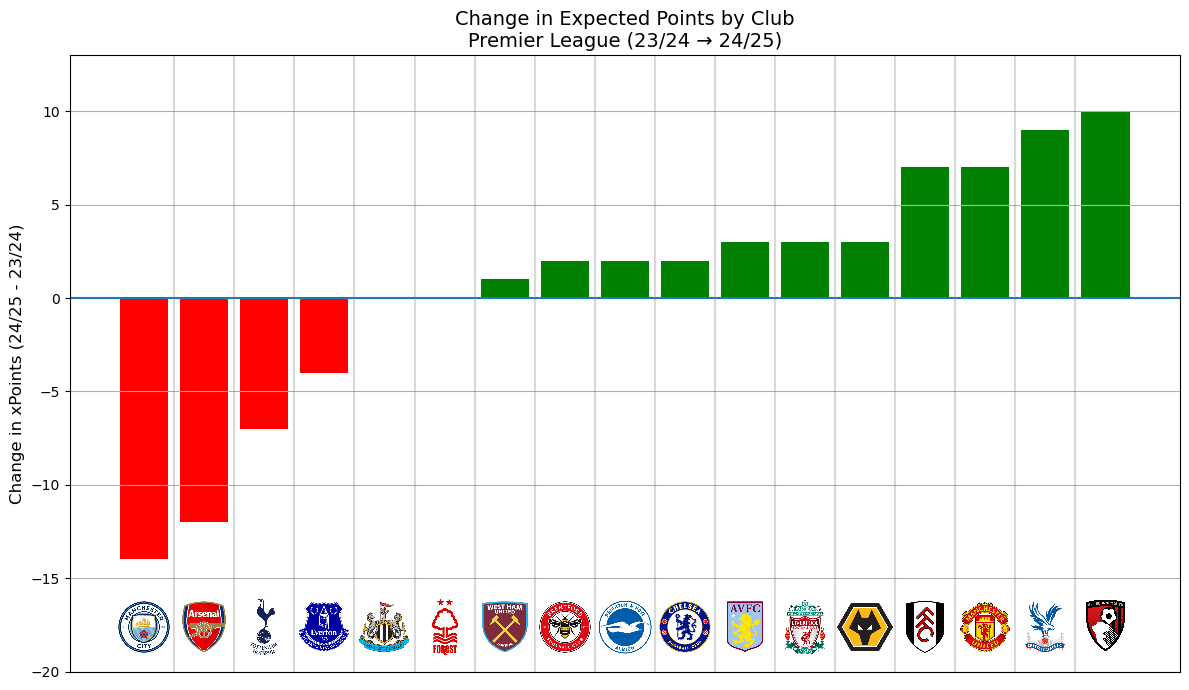

In [74]:
# Sort from least gained to most gained
xpoints_sorted = sorted(xpoints_change, key=lambda x: x[1])

teams = [team for team, value in xpoints_sorted]
values = [value for team, value in xpoints_sorted]

colors = ["green" if v > 0 else "red" if v < 0 else "grey" for v in values]

x_positions = np.arange(len(teams))

plt.figure(figsize=(12, 7))
bars = plt.bar(x_positions, values, color=colors)

plt.axhline(0)

# REMOVE text labels
plt.xticks([])

for i, team in enumerate(teams):
    img = plt.imread(crest_paths[team])
    
    # Reduce Bournemouth slightly
    zoom_level = 0.035 if team == "Bournemouth" else 0.09
    
    imagebox = OffsetImage(img, zoom=zoom_level)

    ab = AnnotationBbox(
        imagebox,
        (i, min(values) - 2),
        frameon=False,
        box_alignment=(0.5, 1)
    )

    plt.gca().add_artist(ab)

plt.ylabel("Change in xPoints (24/25 - 23/24)", fontsize=12)
plt.title("Change in Expected Points by Club\nPremier League (23/24 → 24/25)", fontsize=14)

plt.ylim(min(values) - 6, max(values) + 3)

plt.tight_layout()
plt.grid()
for i in range(0,16):
    plt.axvline(i+.5, color = 'grey', alpha = 0.3)

plt.show()

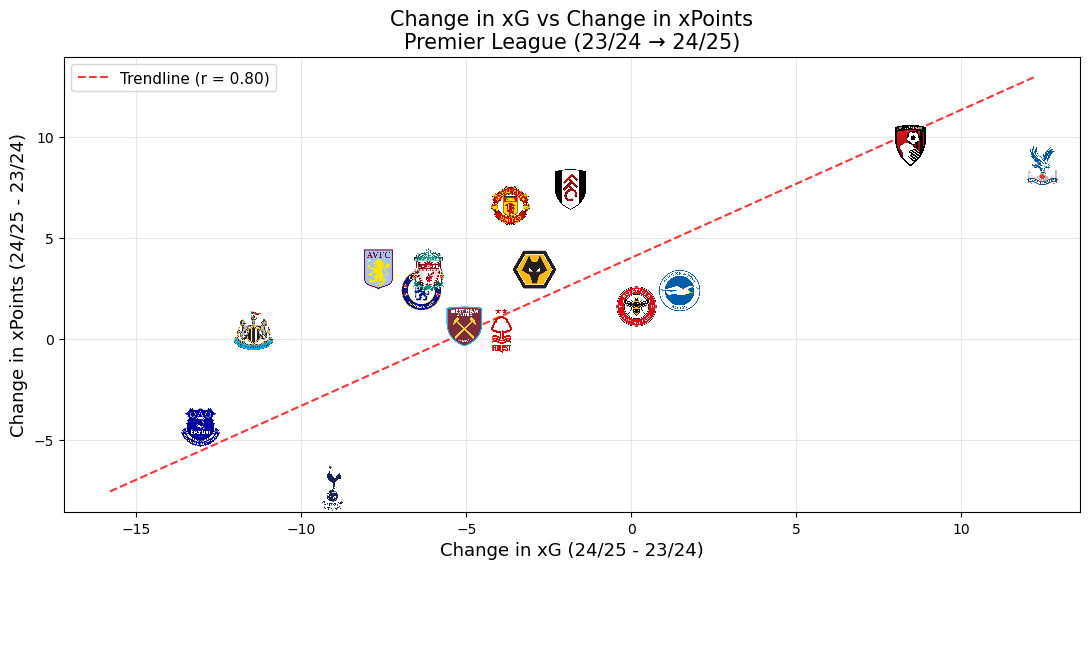

In [75]:
# --- Data dictionaries ---
xp_dict = dict(xpoints_change)
xg_dict = dict(xg_change)

teams = sorted(xp_dict.keys())

xp_values = np.array([xp_dict[t] for t in teams])
xg_values = np.array([xg_dict[t] for t in teams])

# --- Manual correlation ---
xg_mean = np.mean(xg_values)
xp_mean = np.mean(xp_values)

numerator = sum((x - xg_mean) * (y - xp_mean) for x, y in zip(xg_values, xp_values))
denom_xg = np.sqrt(sum((x - xg_mean) ** 2 for x in xg_values))
denom_xp = np.sqrt(sum((y - xp_mean) ** 2 for y in xp_values))

correlation = numerator / (denom_xg * denom_xp)

# --- Plot ---
plt.figure(figsize=(11, 7))

# Offset pattern to reduce overlap
offsets = [(6,6), (-6,6), (6,-6), (-6,-6)]

# Plot crests instead of scatter points
for i, team in enumerate(teams):

    img = plt.imread(crest_paths[team])

    base_zoom = 0.07
    zoom_level = base_zoom / 2.5 if team == "Bournemouth" else base_zoom

    imagebox = OffsetImage(img, zoom=zoom_level)

    dx, dy = offsets[i % 4]

    ab = AnnotationBbox(
        imagebox,
        (xg_values[i], xp_values[i]),
        xybox=(dx, dy),
        xycoords='data',
        boxcoords="offset points",
        frameon=False
    )

    plt.gca().add_artist(ab)

# --- Trendline ---
z = np.polyfit(xg_values, xp_values, 1)
p = np.poly1d(z)
x_line = np.linspace(min(xg_values), max(xg_values), 100)

plt.plot(x_line, p(x_line), "r--", alpha=0.8,
         label=f'Trendline (r = {correlation:.2f})')

plt.xlabel('Change in xG (24/25 - 23/24)', fontsize=13)
plt.ylabel('Change in xPoints (24/25 - 23/24)', fontsize=13)
plt.title('Change in xG vs Change in xPoints\nPremier League (23/24 → 24/25)', fontsize=15)

plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

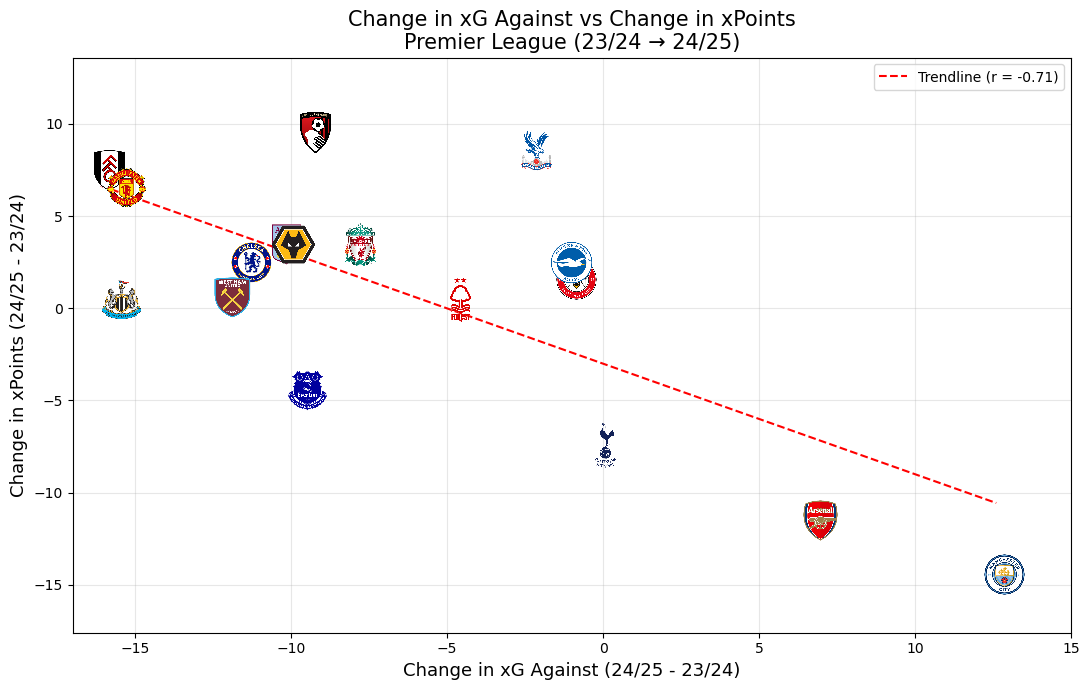

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# --- Data ---
xp_dict = dict(xpoints_change)
xga_dict = dict(xg_against_change)

teams = sorted(xp_dict.keys())

xp_values = np.array([xp_dict[t] for t in teams])
xga_values = np.array([xga_dict[t] for t in teams])

# --- Correlation (manual) ---
xga_mean = np.mean(xga_values)
xp_mean = np.mean(xp_values)

numerator = sum((x - xga_mean) * (y - xp_mean) for x, y in zip(xga_values, xp_values))
denom_xga = np.sqrt(sum((x - xga_mean) ** 2 for x in xga_values))
denom_xp = np.sqrt(sum((y - xp_mean) ** 2 for y in xp_values))

correlation = numerator / (denom_xga * denom_xp)

# --- Plot ---
plt.figure(figsize=(11, 7))

offsets = [(6,6), (-6,6), (6,-6), (-6,-6)]

for i, team in enumerate(teams):

    img = plt.imread(crest_paths[team])

    base_zoom = 0.07
    zoom_level = base_zoom / 2.5 if team == "Bournemouth" else base_zoom

    imagebox = OffsetImage(img, zoom=zoom_level)

    dx, dy = offsets[i % 4]

    ab = AnnotationBbox(
        imagebox,
        (xga_values[i], xp_values[i]),
        xybox=(dx, dy),
        xycoords='data',
        boxcoords="offset points",
        frameon=False
    )

    plt.gca().add_artist(ab)

# --- Trendline ---
z = np.polyfit(xga_values, xp_values, 1)
p = np.poly1d(z)
x_line = np.linspace(min(xga_values), max(xga_values), 100)

plt.plot(x_line, p(x_line), "r--",
         label=f"Trendline (r = {correlation:.2f})")

plt.xlabel("Change in xG Against (24/25 - 23/24)", fontsize=13)
plt.ylabel("Change in xPoints (24/25 - 23/24)", fontsize=13)
plt.title("Change in xG Against vs Change in xPoints\nPremier League (23/24 → 24/25)", fontsize=15)

plt.legend()
plt.grid(True, alpha=0.3)
# --- Expand axis limits to prevent clipping ---
x_margin = (max(xga_values) - min(xga_values)) * 0.15
y_margin = (max(xp_values) - min(xp_values)) * 0.15

plt.xlim(-17,15)
plt.ylim(min(xp_values) - y_margin, max(xp_values) + y_margin)

plt.tight_layout()
plt.show()

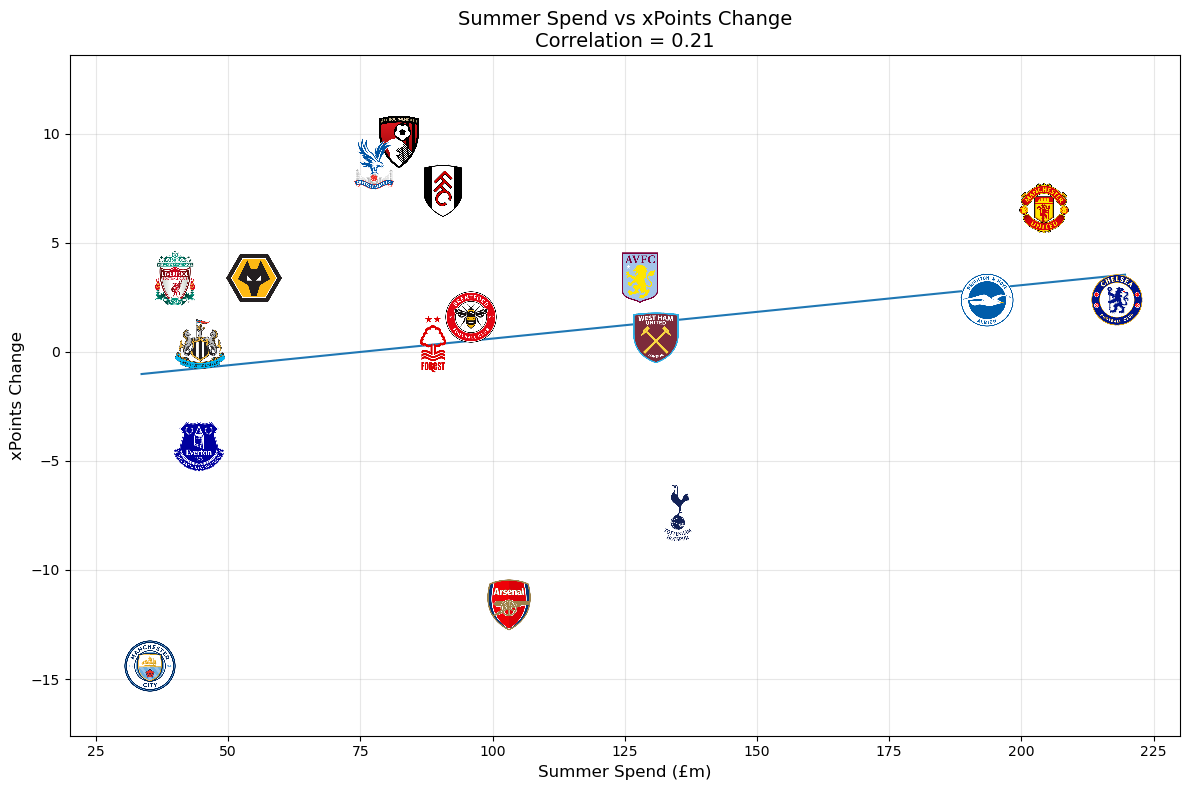

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# --- Convert to dictionaries ---
xpoints_dict = dict(xpoints_change)
spend_dict = dict(club_spend_24_25)

# --- Align data alphabetically ---
clubs = sorted(spend_dict.keys())
spend = np.array([spend_dict[c] for c in clubs])
xpoints = np.array([xpoints_dict[c] for c in clubs])

# --- Correlation ---
correlation = np.corrcoef(spend, xpoints)[0, 1]

# --- Line of best fit ---
slope, intercept = np.polyfit(spend, xpoints, 1)
line_x = np.linspace(min(spend), max(spend), 100)
line_y = slope * line_x + intercept

# --- Plot ---
plt.figure(figsize=(12, 8))

offsets = [(6,6), (-6,6), (6,-6), (-6,-6)]

# Plot crests instead of scatter points
for i, club in enumerate(clubs):

    img = plt.imread(crest_paths[club])

    base_zoom = 0.09
    zoom_level = base_zoom / 2.5 if club == "Bournemouth" else base_zoom

    imagebox = OffsetImage(img, zoom=zoom_level)

    dx, dy = offsets[i % 4]

    ab = AnnotationBbox(
        imagebox,
        (spend[i], xpoints[i]),
        xybox=(dx, dy),
        xycoords='data',
        boxcoords="offset points",
        frameon=False
    )

    plt.gca().add_artist(ab)

# --- Trendline ---
plt.plot(line_x, line_y)

# --- Prevent clipping ---
x_margin = (max(spend) - min(spend)) * 0.15
y_margin = (max(xpoints) - min(xpoints)) * 0.15

plt.xlim(20,230)
plt.ylim(min(xpoints) - y_margin, max(xpoints) + y_margin)

plt.xlabel("Summer Spend (£m)", fontsize=12)
plt.ylabel("xPoints Change", fontsize=12)
plt.title(f"Summer Spend vs xPoints Change\nCorrelation = {correlation:.2f}", fontsize=14)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

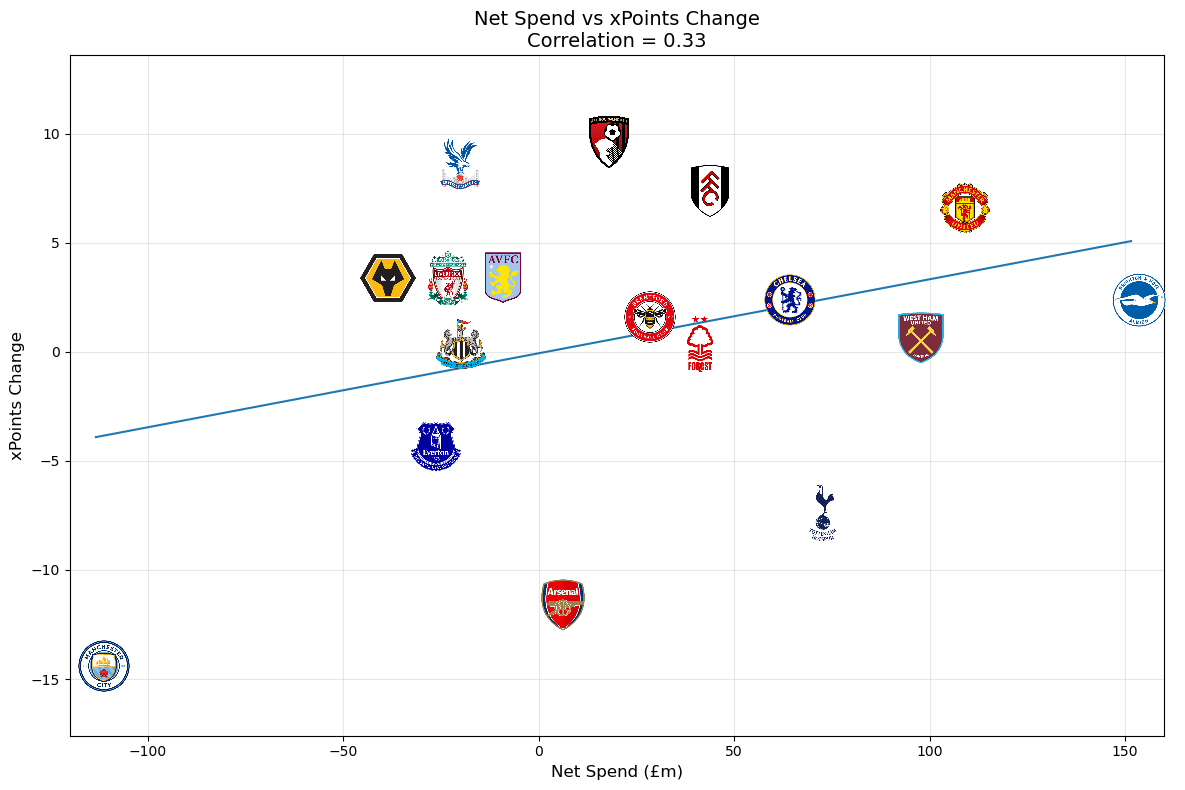

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# --- Convert to dictionaries ---
xpoints_dict = dict(xpoints_change)
net_dict = dict(net_spend_24_25)

# --- Align alphabetically ---
clubs = sorted(net_dict.keys())
net = np.array([net_dict[c] for c in clubs])
xpoints = np.array([xpoints_dict[c] for c in clubs])

# --- Correlation ---
correlation = np.corrcoef(net, xpoints)[0, 1]

# --- Line of best fit ---
slope, intercept = np.polyfit(net, xpoints, 1)
line_x = np.linspace(min(net), max(net), 100)
line_y = slope * line_x + intercept

# --- Plot ---
plt.figure(figsize=(12, 8))

offsets = [(6,6), (-6,6), (6,-6), (-6,-6)]

for i, club in enumerate(clubs):

    img = plt.imread(crest_paths[club])

    base_zoom = 0.09
    zoom_level = base_zoom / 2.5 if club == "Bournemouth" else base_zoom

    imagebox = OffsetImage(img, zoom=zoom_level)

    dx, dy = offsets[i % 4]

    ab = AnnotationBbox(
        imagebox,
        (net[i], xpoints[i]),
        xybox=(dx, dy),
        xycoords='data',
        boxcoords="offset points",
        frameon=False
    )

    plt.gca().add_artist(ab)

# --- Trendline ---
plt.plot(line_x, line_y)

# --- Prevent crest clipping ---
x_margin = (max(net) - min(net)) * 0.15
y_margin = (max(xpoints) - min(xpoints)) * 0.15

plt.xlim(-120,160)
plt.ylim(min(xpoints) - y_margin, max(xpoints) + y_margin)

plt.xlabel("Net Spend (£m)", fontsize=12)
plt.ylabel("xPoints Change", fontsize=12)
plt.title(f"Net Spend vs xPoints Change\nCorrelation = {correlation:.2f}", fontsize=14)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()